### Investigation on credit risk migration in terms of Probability of Default 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
df

,PERIOD,CUSTOMER_ID,BRANCH,APPROACH,RATING,PD,LGD,ORIGINAL_EXPOSURE,EAD_AMOUNT,RWA,EXPECTED_LOSS
0,Period1,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,4250.0,4832.7,94.8
1,Period2,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,25000.0,28235.2,557.7
2,Period1,G136767,Sydney,AIRB,PC0+,1.00000,0.316,1000.0,0.0,0.0,0.0
3,Period2,G136767,Sydney,AIRB,PC0+,1.00000,0.316,900.0,0.0,0.0,0.0
4,Period2,C136711,Sydney,AIRB,PC0+,1.00000,0.316,241.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1604416,Period2,V341740,Kuala Lumpur,FIRB,PC4,0.00353,0.450,783.8,783.8,490.3,1.2
1604417,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.450,921.6,921.6,493.4,1.5
1604418,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.400,1400.7,1400.7,666.6,2.0
1604419,Period2,W341741,Kuala Lumpur,FIRB,PC3,0.01247,0.450,334.6,334.6,284.5,1.9


#### PD and LGD are exposure weighted by EAD based on the following formula:
∑(PD×EAD)/∑(EAD)   
∑(LGD×EAD)/∑(EAD)

In [4]:
df=df[df["EAD_AMOUNT"]!=0]

In [5]:
df["Risk_Weight"]= df["RWA"]/df["EAD_AMOUNT"]

In [6]:
df["PD1"]=df["PD"] * df["EAD_AMOUNT"]

In [7]:
df["LGD1"]=df["LGD"] * df["EAD_AMOUNT"]

In [8]:
k=df.groupby(['CUSTOMER_ID',"PERIOD"]).agg({"EAD_AMOUNT":"sum","PD1":"sum","LGD1":"sum","EXPECTED_LOSS":"sum","Risk_Weight":"mean"})

In [9]:
k["PD_weighted"]=k["PD1"]/k["EAD_AMOUNT"]

In [10]:
k["LGD_weighted"]=k["LGD1"]/k["EAD_AMOUNT"]

In [11]:
result=pd.pivot_table(k,index=["CUSTOMER_ID"], columns='PERIOD', values=['PD_weighted',"EAD_AMOUNT","EXPECTED_LOSS","LGD_weighted"])

In [12]:
### The total amount of PD in period 1

In [13]:
c=result[(  'PD_weighted', 'Period1')]*result[( 'EAD_AMOUNT', 'Period1')]
a=c.sum()
b=result[( 'EAD_AMOUNT', 'Period1')].sum()
PD_1=a/b
PD_1

0.03199809069778595

In [14]:
### The total amount of PD in period 2

In [15]:
c2=result[(  'PD_weighted', 'Period2')]*result[( 'EAD_AMOUNT', 'Period2')]
a2=c2.sum()
b2=result[( 'EAD_AMOUNT', 'Period2')].sum()
PD_2=a2/b2
PD_2

0.03455348354261662

In [16]:
### The total amount of PD for exist customers

In [17]:
Exist_customer=result[(result[( 'PD_weighted', 'Period1')].notna())&(result[( 'PD_weighted', 'Period2')].notna())]
Exist_customer

EAD_AMOUNT           EXPECTED_LOSS         LGD_weighted          \
PERIOD         Period1   Period2       Period1 Period2      Period1 Period2   
CUSTOMER_ID                                                                   
A1            169748.3  174486.4        1909.7    23.6        0.450   0.450   
A100023          441.1     938.9           1.5     3.2        0.276   0.276   
A100049          161.7     342.0           0.0     0.1        0.204   0.270   
A100101           17.6      37.0           0.1     0.0        0.265   0.265   
A10011           150.3     114.7           0.3     0.2        0.315   0.315   
...                ...       ...           ...     ...          ...     ...   
Z99866             5.0      10.0           0.0     0.0        0.378   0.378   
Z99892            27.2      57.7           0.1     0.1        0.378   0.378   
Z99918            97.8     209.3           0.7     0.1        0.276   0.378   
Z99970           277.2     653.4           0.2     0.3        0.371   0.371   
Z99996           430.2     921.2           0.2     0.5        0.315   0.315   

            PD_weighted           
PERIOD          Period1  Period2  
CUSTOMER_ID                       
A1              0.02500  0.00030  
A100023         0.01247  0.01247  
A100049         0.00104  0.00104  
A100101         0.01247  0.00353  
A10011          0.00553  0.00553  
...                 ...      ...  
Z99866          0.02500  0.00247  
Z99892          0.01247  0.00353  
Z99918          0.02500  0.00156  
Z99970          0.00156  0.00104  
Z99996          0.00156  0.00156  

[451129 rows x 8 columns]

In [18]:
c3=Exist_customer[(  'PD_weighted', 'Period2')]*Exist_customer[( 'EAD_AMOUNT', 'Period2')]
a3=c3.sum()
b3=Exist_customer[( 'EAD_AMOUNT', 'Period2')].sum()
PD_E=a3/b3
PD_E

0.03821852782251449

In [19]:
### The total amount of PD for new customers

In [20]:
New_customer=result[(result[( 'PD_weighted', 'Period1')].isna())&(result[( 'PD_weighted', 'Period2')].notna())]
New_customer

EAD_AMOUNT          EXPECTED_LOSS         LGD_weighted            \
PERIOD         Period1  Period2       Period1 Period2      Period1   Period2   
CUSTOMER_ID                                                                    
A105821            NaN    315.4           NaN     0.2          NaN  0.204000   
A106705            NaN   6236.6           NaN    12.9          NaN  0.257473   
A106861            NaN   1620.6           NaN     0.5          NaN  0.204000   
A10687             NaN    798.3           NaN     0.4          NaN  0.291000   
A106887            NaN   2175.1           NaN    11.1          NaN  0.204000   
...                ...      ...           ...     ...          ...       ...   
Z95836             NaN  69589.9           NaN   121.2          NaN  0.315000   
Z96018             NaN  58002.2           NaN    69.8          NaN  0.341000   
Z96122             NaN    113.3           NaN     0.0          NaN  0.366000   
Z96148             NaN   1275.8           NaN     1.1          NaN  0.341000   
Z96252             NaN   5283.7           NaN     7.1          NaN  0.378000   

            PD_weighted           
PERIOD          Period1  Period2  
CUSTOMER_ID                       
A105821             NaN  0.00247  
A106705             NaN  0.00812  
A106861             NaN  0.00156  
A10687              NaN  0.00156  
A106887             NaN  0.02500  
...                 ...      ...  
Z95836              NaN  0.00553  
Z96018              NaN  0.00353  
Z96122              NaN  0.00070  
Z96148              NaN  0.00247  
Z96252              NaN  0.00353  

[103505 rows x 8 columns]

In [21]:
c4=New_customer[(  'PD_weighted', 'Period2')]*New_customer[( 'EAD_AMOUNT', 'Period2')]
a4=c4.sum()
b4=New_customer[( 'EAD_AMOUNT', 'Period2')].sum()
PD_N=a4/b4
PD_N

0.02902886290200162

In [22]:
### PD_Unrated (RATING=PCU)

In [23]:
df2=df[df["RATING"]=="PCU"]

In [24]:
df2["Risk_Weight"]= df2["RWA"]/df2["EAD_AMOUNT"]

In [25]:
df2["PD1"]=df2["PD"] * df2["EAD_AMOUNT"]

In [26]:
df2["LGD1"]=df2["LGD"] * df2["EAD_AMOUNT"]

In [27]:
k=df2.groupby(['CUSTOMER_ID',"PERIOD"]).agg({"EAD_AMOUNT":np.sum,"PD1":np.sum,"LGD1":np.sum,"EXPECTED_LOSS":np.sum,"Risk_Weight":np.mean})

In [28]:
k["PD_weighted"]=k["PD1"]/k["EAD_AMOUNT"]

In [29]:
k["LGD_weighted"]=k["LGD1"]/k["EAD_AMOUNT"]

In [30]:
result=k.pivot_table(index=["CUSTOMER_ID"], columns='PERIOD', values=['PD_weighted',"EAD_AMOUNT","EXPECTED_LOSS","LGD_weighted"])
result

EAD_AMOUNT         EXPECTED_LOSS         LGD_weighted           \
PERIOD         Period1 Period2       Period1 Period2      Period1  Period2   
CUSTOMER_ID                                                                  
A1            169748.3     NaN        1909.7     NaN     0.450000      NaN   
A100517           99.2   420.9           0.8     3.2     0.316000  0.30854   
A101557            8.7     NaN           0.1     NaN     0.378000      NaN   
A102233            7.4     NaN           0.1     NaN     0.276000      NaN   
A10401           221.3     NaN           1.7     NaN     0.316000      NaN   
...                ...     ...           ...     ...          ...      ...   
Z99060            27.3     NaN           0.2     NaN     0.273099      NaN   
Z99138             9.5     NaN           0.1     NaN     0.378000      NaN   
Z99424            47.4     NaN           0.4     NaN     0.378000      NaN   
Z99866             5.0     NaN           0.0     NaN     0.378000      NaN   
Z99918            97.8     NaN           0.7     NaN     0.276000      NaN   

            PD_weighted          
PERIOD          Period1 Period2  
CUSTOMER_ID                      
A1                0.025     NaN  
A100517           0.025   0.025  
A101557           0.025     NaN  
A102233           0.025     NaN  
A10401            0.025     NaN  
...                 ...     ...  
Z99060            0.025     NaN  
Z99138            0.025     NaN  
Z99424            0.025     NaN  
Z99866            0.025     NaN  
Z99918            0.025     NaN  

[63838 rows x 8 columns]

In [31]:
### The total amount of PD in period 1

In [32]:
c=result[(  'PD_weighted', 'Period1')]*result[( 'EAD_AMOUNT', 'Period1')]
a=c.sum()
b=result[( 'EAD_AMOUNT', 'Period1')].sum()
PD_1=a/b
PD_1

0.020106739893737912

In [33]:
### The total amount of PD in period 2

In [34]:
c2=result[(  'PD_weighted', 'Period2')]*result[( 'EAD_AMOUNT', 'Period2')]
a2=c2.sum()
b2=result[( 'EAD_AMOUNT', 'Period2')].sum()
PD_2=a2/b2
PD_2

0.019868112051138132

In [35]:
### The total amount of PD for unrated exist customers

In [36]:
Exist_customer=result[(result[( 'PD_weighted', 'Period1')].notna())&(result[( 'PD_weighted', 'Period2')].notna())]
Exist_customer

EAD_AMOUNT         EXPECTED_LOSS         LGD_weighted            \
PERIOD         Period1 Period2       Period1 Period2      Period1   Period2   
CUSTOMER_ID                                                                   
A100517           99.2   420.9           0.8     3.2     0.316000  0.308540   
A104287          402.2   385.3           0.0     3.0     0.000000  0.315000   
A104339          390.9   210.5           2.0     1.1     0.204000  0.204000   
A104391         1233.3  1233.3           6.3     6.3     0.204000  0.204000   
A104417          450.9   450.8           2.4     2.4     0.212128  0.212114   
...                ...     ...           ...     ...          ...       ...   
Z93964            24.2    23.8           0.2     0.2     0.370000  0.370000   
Z94198             4.5    42.9           0.0     0.3     0.315000  0.315000   
Z94354            60.7    89.2           0.6     0.8     0.370000  0.370000   
Z94588            77.9    81.8           0.7     0.8     0.370000  0.370000   
Z97864            88.9   186.1           0.6     1.4     0.290274  0.291000   

            PD_weighted          
PERIOD          Period1 Period2  
CUSTOMER_ID                      
A100517           0.025   0.025  
A104287           0.000   0.025  
A104339           0.025   0.025  
A104391           0.025   0.025  
A104417           0.025   0.025  
...                 ...     ...  
Z93964            0.025   0.025  
Z94198            0.025   0.025  
Z94354            0.025   0.025  
Z94588            0.025   0.025  
Z97864            0.025   0.025  

[33802 rows x 8 columns]

In [37]:
c3=Exist_customer[(  'PD_weighted', 'Period2')]*Exist_customer[( 'EAD_AMOUNT', 'Period2')]
a3=c3.sum()
b3=Exist_customer[( 'EAD_AMOUNT', 'Period2')].sum()
PD_E=a3/b3
PD_E

0.017494267043051997

In [38]:
### The total amount of PD for unrated new customers

In [39]:
New_customer=result[(result[( 'PD_weighted', 'Period1')].isna())&(result[( 'PD_weighted', 'Period2')].notna())]
New_customer

EAD_AMOUNT         EXPECTED_LOSS         LGD_weighted          \
PERIOD         Period1 Period2       Period1 Period2      Period1 Period2   
CUSTOMER_ID                                                                 
A104547            NaN   918.8           NaN     8.5          NaN   0.370   
A106887            NaN  2175.1           NaN    11.1          NaN   0.204   
A107433            NaN   133.7           NaN     1.3          NaN   0.378   
A107563            NaN  1145.3           NaN     0.0          NaN   0.000   
A107719            NaN   325.0           NaN     1.7          NaN   0.204   
...                ...     ...           ...     ...          ...     ...   
Z91936             NaN    21.1           NaN     0.2          NaN   0.370   
Z92482             NaN     4.1           NaN     0.0          NaN   0.291   
Z93132             NaN    33.7           NaN     0.3          NaN   0.315   
Z93548             NaN    38.7           NaN     0.3          NaN   0.315   
Z93860             NaN    32.8           NaN     0.3          NaN   0.315   

            PD_weighted          
PERIOD          Period1 Period2  
CUSTOMER_ID                      
A104547             NaN   0.025  
A106887             NaN   0.025  
A107433             NaN   0.025  
A107563             NaN   0.000  
A107719             NaN   0.025  
...                 ...     ...  
Z91936              NaN   0.025  
Z92482              NaN   0.025  
Z93132              NaN   0.025  
Z93548              NaN   0.025  
Z93860              NaN   0.025  

[12866 rows x 8 columns]

In [40]:
c4=New_customer[(  'PD_weighted', 'Period2')]*New_customer[( 'EAD_AMOUNT', 'Period2')]
a4=c4.sum()
b4=New_customer[( 'EAD_AMOUNT', 'Period2')].sum()
PD_N=a4/b4
PD_N

0.021535629988636083

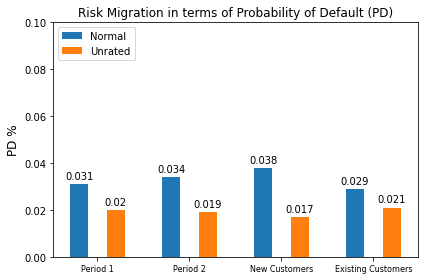

In [44]:
labels = ['Period 1', 'Period 2', 'New Customers', 'Existing Customers']

PD_Normal = [0.031,0.034,0.029,0.038]
PD_Unrated =[0.020,0.019,0.021,0.017]


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, PD_Normal, width, label='Normal')
rects3 = ax.bar(x + width, PD_Unrated, width, label='Unrated')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PD %', fontsize=12)
ax.set_title('Risk Migration in terms of Probability of Default (PD)')
ax.set_xticks(x, labels, fontsize=8)
ax.legend(loc='upper left', fontsize=10)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects3, padding=3)
plt.ylim([0,0.1])

fig.tight_layout()

plt.show()